<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Region       6 non-null      object 
 1   Year         6 non-null      int64  
 2   Yield        6 non-null      float64
 3   Rainfall     6 non-null      int64  
 4   Temperature  6 non-null      int64  
 5   Humidity     6 non-null      int64  
 6   Crop_Rice    6 non-null      bool   
 7   Crop_Wheat   6 non-null      bool   
dtypes: bool(2), float64(1), int64(4), object(1)
memory usage: 432.0+ bytes
None
              Year     Yield    Rainfall  Temperature   Humidity
count     6.000000  6.000000    6.000000     6.000000   6.000000
mean   2018.500000  3.300000  233.333333    25.500000  62.666667
std       0.547723  0.684105   57.154761     2.738613   6.918574
min    2018.000000  2.500000  180.000000    22.000000  55.000000
25%    2018.000000  2.800000  192.500000    23.500000  57.750000
50%    20

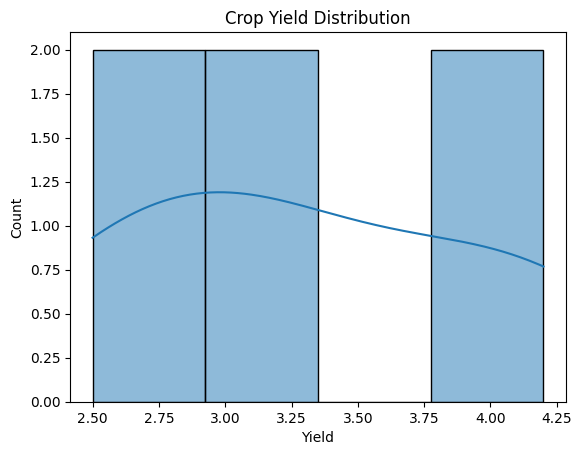

RMSE: 1.13
R^2: -125.85


In [1]:
# Add src to sys.path for module imports
import sys
import os
sys.path.append(os.path.abspath('e:\code\Local projects\Data Science Projects(R and Python)\Crop yielding prediction using climate data\notebooks'))
sys.path.append(r"e:\code\Local projects\Data Science Projects(R and Python)\Crop yielding prediction using climate data\src")

# Import project modules
from data_loader import load_crop_data, load_climate_data, merge_datasets
from preprocessing import clean_data
from model import train_model

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load datasets
crop_df = load_crop_data(r"e:\code\Local projects\Data Science Projects(R and Python)\Crop yielding prediction using climate data\data\raw\crop_yield.csv")
climate_df = load_climate_data(r"e:\code\Local projects\Data Science Projects(R and Python)\Crop yielding prediction using climate data\data\raw\climate_data.csv")

# Merge datasets
df = merge_datasets(crop_df, climate_df)

# Clean data
df_clean = clean_data(df)

# EDA: Show basic info
print(df_clean.info())
print(df_clean.describe())

# Visualize yield distribution
sns.histplot(df_clean['Yield'], kde=True)
plt.title('Crop Yield Distribution')
plt.show()

# Train model
model = train_model(df_clean)